In [41]:
import squidpy as sq
import seaborn as sns
import shout
import pandas as pd
from IPython.display import set_matplotlib_formats
import random
import scanpy as sc

In [2]:
mibitof = sq.datasets.mibitof()

In [3]:
mibitof

AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2'
    uns: 'Cluster_colors', 'batch_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'X_scanorama', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [30]:
mibitof_df=mibitof.to_df()

In [156]:
indices=mibitof.to_df().index
indices=indices.to_list()

In [34]:
len(indices)

3309

In [37]:
mibitof_df=mibitof_df.reset_index(drop=True)

In [38]:
mibitof_df

,ASCT2,ATP5A,CD11c,CD14,CD3,CD31,CD36,CD39,CD4,CD45,...,NRF2p,NaKATPase,PD1,PKM2,S6p,SDHA,SMA,VDAC1,XBP1,vimentin
0,-0.048445,0.137012,-0.086196,-0.080735,-0.113008,-0.078852,-0.046787,-0.141266,-0.085507,-0.248544,...,-0.054893,0.065361,-0.083144,-0.184737,-0.038722,0.093941,-0.322605,0.080074,-0.000947,-0.321359
1,-0.103411,0.106259,-0.077513,-0.067131,-0.108321,-0.072423,-0.047707,-0.083563,-0.113500,-0.208693,...,0.009360,0.025300,-0.081925,-0.240841,-0.033127,0.071607,-0.281874,0.034381,-0.027246,-0.269943
2,-0.058778,-0.183549,-0.057169,-0.252341,-0.074428,-0.043755,-0.053108,-0.119548,-0.157841,-0.049226,...,-0.135845,-0.155732,-0.066608,-0.133573,-0.206725,-0.176896,0.091195,-0.258185,-0.045451,-0.104695
3,-0.063266,-0.217120,-0.010480,-0.018193,-0.012152,-0.066393,-0.016208,-0.110662,-0.012966,0.106709,...,-0.156271,-0.121936,-0.065462,0.053975,-0.090116,-0.172565,0.086739,-0.233419,-0.040213,0.028672
4,-0.195802,0.225289,-0.038972,-0.017998,-0.078372,-0.053338,-0.055921,-0.064804,-0.047809,0.046930,...,0.029879,-0.219233,-0.077997,-0.154873,-0.078090,0.092791,0.106398,-0.155387,-0.040580,0.011732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,0.021182,0.045632,-0.122180,-0.159719,-0.107684,0.165514,-0.070085,-0.132370,-0.135155,-0.189867,...,0.067894,-0.108838,-0.106829,-0.059154,0.036202,-0.091055,0.239040,0.084519,0.175693,0.180371
3305,-0.132899,-0.285047,-0.028203,0.133393,-0.082585,-0.069386,-0.066176,-0.132192,-0.039072,0.073765,...,-0.234625,-0.225610,-0.094546,0.039629,-0.146379,-0.172444,0.174762,-0.155889,0.153453,0.012337
3306,-0.145032,-0.038225,0.079962,0.143460,-0.112061,-0.083390,-0.069760,0.272488,0.175698,0.181223,...,0.022217,-0.091115,-0.102767,0.153053,0.181595,-0.008561,-0.027603,-0.293268,-0.255045,0.253582
3307,-0.110586,-0.288419,-0.096880,0.083653,-0.094524,-0.061432,-0.060936,-0.264610,-0.170266,0.018944,...,-0.049546,-0.020856,-0.089480,-0.041875,-0.087478,-0.175069,0.079871,-0.381522,-0.116259,0.080427


AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2'
    uns: 'Cluster_colors', 'batch_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'X_scanorama', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [287]:
# --- Imports: ---
import time
# ---- Code: ----
# shout_scores={}
n=[5, 10, 50, 100, 200, 500]
# n=[5, 10]
cluster_key='Cluster'
indices_range=range(len(indices))

LOCAL_ENTROPY_2={}
LOCAL_HOMOPHILY_2={}
EGOPHILY_2={}


for i in n:
    LOCAL_ENTROPY_2[i]=[]
    LOCAL_HOMOPHILY_2[i]=[]
    EGOPHILY_2[i]=[]
    # ---
    local_entropy_2={}
    local_homophily_2={}
    egophily_2={}
    # ---
    for j in range(25):
        # print('Iteration '+str(_count_+1)+', i= '+str(i))
        # ---
        rs=random.sample(indices_range, i)
        # print(mibitof_df.loc[rs])
        mibitof_rand=sc.AnnData(mibitof_df.iloc[rs])
        # ---
        _mibitof_obs_df_=pd.DataFrame(mibitof.obs)
        for j in mibitof.obs.columns:
            mibitof_obs_df=_mibitof_obs_df_[j].iloc[rs]
            mibitof_rand.obs[j]=np.array(mibitof_obs_df)
        # ---
        mibitof_rand.var=mibitof.var
        # ---
        mibitof_rand.uns=mibitof.uns
        # ---
        _mibitof_obsm_df_=pd.DataFrame(mibitof.obsm)
        for j in mibitof.obsm:
            mibitof_obsm_df=pd.DataFrame(mibitof.obsm[j]).iloc[rs]
            mibitof_rand.obsm[j]=np.array(mibitof_obsm_df)
        # ---
        # _mibitof_obsp_df_=pd.DataFrame(mibitof.obsp)
        # for j in mibitof.obsp:
            # mibitof_obsp_df=pd.DataFrame(mibitof.obsp[j]).iloc[rs]
            # mibitof_rand.obsp[j]=np.array(mibitof_obsp_df)
        # ---
        scores_mibitof = shout.all_scores(mibitof_rand, cluster_key, radius=2)
        # end = time.time()
        # ============================
        
        scores=[k for k in pd.DataFrame(mibitof_rand.obs['local_entropy_2']).to_dict()['local_entropy_2'].values()]
        celltypes=[k for k in pd.DataFrame(mibitof_rand.obs[cluster_key]).to_dict()[cluster_key].values()]
        count=-1
        for k in celltypes:
            count+=1
            try:
                local_entropy_2[k].append(scores[count])
            except:
                local_entropy_2[k]=[]
                local_entropy_2[k].append(scores[count])
        LOCAL_ENTROPY_2[i].append(local_entropy_2)
        # ============================
        
        scores=[k for k in pd.DataFrame(mibitof_rand.obs['local_homophily_2']).to_dict()['local_homophily_2'].values()]
        celltypes=[k for k in pd.DataFrame(mibitof_rand.obs[cluster_key]).to_dict()[cluster_key].values()]
        count=-1
        for k in celltypes:
            count+=1
            try:
                local_homophily_2[k].append(scores[count])
            except:
                local_homophily_2[k]=[]
                local_homophily_2[k].append(scores[count])
        LOCAL_HOMOPHILY_2[i].append(local_homophily_2)
        # ============================
        
        scores=[k for k in pd.DataFrame(mibitof_rand.obs['egophily_2']).to_dict()['egophily_2'].values()]
        celltypes=[k for k in pd.DataFrame(mibitof_rand.obs[cluster_key]).to_dict()[cluster_key].values()]
        count=-1
        for k in celltypes:
            count+=1
            try:
                egophily_2[k].append(scores[count])
            except:
                egophily_2[k]=[]
                egophily_2[k].append(scores[count])
        EGOPHILY_2[i].append(egophily_2)
        # ============================

/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/s

##### Make DICT for LOCAL_ENTROPY_2:

In [288]:
dict_LOCAL_ENTROPY_2={}
for i in LOCAL_ENTROPY_2:
    dict_LOCAL_ENTROPY_2[i]={}
    _dict_={}
    for j in range(len(LOCAL_ENTROPY_2[i])):
        for k in LOCAL_ENTROPY_2[i][j]:
            try:
                _dict_[k].append(LOCAL_ENTROPY_2[i][j][k])
            except:
                _dict_[k]=[]
                _dict_[k].append(LOCAL_ENTROPY_2[i][j][k])
    # ---
    for j in _dict_:
        flat_list = [
                    x
                    for xs in _dict_[j]
                    for x in xs
                ]
        _dict_[j]=flat_list
    # =====
    # _df_=pd.DataFrame()
    celltype_list=[]
    scores_list=[]
    _len_=0
    for j in _dict_:
        # _df_['celltype']=[j]*len(_dict_[j])
        # _df_['score']=_dict_[j]
        _len_+=len(_dict_[j])
        celltype_list.append([j] * len(_dict_[j]))
        scores_list.append(_dict_[j])
        # _df_['celltype']=[j]*len(_dict_[j])
    radius_list=[i]*_len_
    # ---
    flat_list = [
                    x
                    for xs in celltype_list
                    for x in xs
                ]
    celltype_list=flat_list
    # ---
    flat_list = [
                    x
                    for xs in scores_list
                    for x in xs
                ]
    scores_list=flat_list
    # ---
    dict_LOCAL_ENTROPY_2[i]['celltype']=celltype_list
    dict_LOCAL_ENTROPY_2[i]['scores']=scores_list
    dict_LOCAL_ENTROPY_2[i]['radius']=radius_list
    # ---
        
    
    '''_df_[j]=_dict_[j]
        _len_+=len(_dict_[j])
    _df_['radius']=[i]*_len_'''

# df_LOCAL_ENTROPY_2=pd.DataFrame()
dict_LOCAL_ENTROPY_2_values=[k for k in dict_LOCAL_ENTROPY_2.values()]
df={}
for i in dict_LOCAL_ENTROPY_2_values:
    for j in i:
        try:
            df[j].append(i[j])
        except:
            df[j]=[]
            df[j].append(i[j])

df_final={}
for i in df:
    flat_list = [
                    x
                    for xs in df[i]
                    for x in xs
                ]
    df_final[i]=flat_list

df_LOCAL_ENTROPY_2=pd.DataFrame.from_dict(df_final)
print(df_LOCAL_ENTROPY_2)

           celltype    scores  radius
0        Fibroblast  0.864974       5
1        Fibroblast  0.960230       5
2        Fibroblast  0.960964       5
3        Fibroblast  0.960230       5
4        Fibroblast  0.960964       5
...             ...       ...     ...
540620  Endothelial  0.823442     500
540621  Endothelial  0.813417     500
540622  Endothelial  0.591071     500
540623  Endothelial  0.656604     500
540624  Endothelial  0.652848     500

[540625 rows x 3 columns]


##### Make DICT for LOCAL_HOMOPHILY_2:

In [289]:
dict_LOCAL_HOMOPHILY_2={}
for i in LOCAL_HOMOPHILY_2:
    dict_LOCAL_HOMOPHILY_2[i]={}
    _dict_={}
    for j in range(len(LOCAL_HOMOPHILY_2[i])):
        for k in LOCAL_HOMOPHILY_2[i][j]:
            try:
                _dict_[k].append(LOCAL_HOMOPHILY_2[i][j][k])
            except:
                _dict_[k]=[]
                _dict_[k].append(LOCAL_HOMOPHILY_2[i][j][k])
    # ---
    for j in _dict_:
        flat_list = [
                    x
                    for xs in _dict_[j]
                    for x in xs
                ]
        _dict_[j]=flat_list
    # =====
    # _df_=pd.DataFrame()
    celltype_list=[]
    scores_list=[]
    _len_=0
    for j in _dict_:
        # _df_['celltype']=[j]*len(_dict_[j])
        # _df_['score']=_dict_[j]
        _len_+=len(_dict_[j])
        celltype_list.append([j] * len(_dict_[j]))
        scores_list.append(_dict_[j])
        # _df_['celltype']=[j]*len(_dict_[j])
    radius_list=[i]*_len_
    # ---
    flat_list = [
                    x
                    for xs in celltype_list
                    for x in xs
                ]
    celltype_list=flat_list
    # ---
    flat_list = [
                    x
                    for xs in scores_list
                    for x in xs
                ]
    scores_list=flat_list
    # ---
    dict_LOCAL_HOMOPHILY_2[i]['celltype']=celltype_list
    dict_LOCAL_HOMOPHILY_2[i]['scores']=scores_list
    dict_LOCAL_HOMOPHILY_2[i]['radius']=radius_list
    # ---
        
    
    '''_df_[j]=_dict_[j]
        _len_+=len(_dict_[j])
    _df_['radius']=[i]*_len_'''

# df_LOCAL_HOMOPHILY_2=pd.DataFrame()
dict_LOCAL_HOMOPHILY_2_values=[k for k in dict_LOCAL_HOMOPHILY_2.values()]
df={}
for i in dict_LOCAL_HOMOPHILY_2_values:
    for j in i:
        try:
            df[j].append(i[j])
        except:
            df[j]=[]
            df[j].append(i[j])

df_final={}
for i in df:
    flat_list = [
                    x
                    for xs in df[i]
                    for x in xs
                ]
    df_final[i]=flat_list

df_LOCAL_HOMOPHILY_2=pd.DataFrame.from_dict(df_final)
print(df_LOCAL_HOMOPHILY_2)

           celltype    scores  radius
0        Fibroblast  0.230769       5
1        Fibroblast  0.166667       5
2        Fibroblast  0.000000       5
3        Fibroblast  0.083333       5
4        Fibroblast  0.000000       5
...             ...       ...     ...
540620  Endothelial  0.016304     500
540621  Endothelial  0.019262     500
540622  Endothelial  0.049869     500
540623  Endothelial  0.028061     500
540624  Endothelial  0.034234     500

[540625 rows x 3 columns]


##### Make DICT for EGOPHILY_2:

In [290]:
dict_EGOPHILY_2={}
for i in EGOPHILY_2:
    dict_EGOPHILY_2[i]={}
    _dict_={}
    for j in range(len(EGOPHILY_2[i])):
        for k in EGOPHILY_2[i][j]:
            try:
                _dict_[k].append(EGOPHILY_2[i][j][k])
            except:
                _dict_[k]=[]
                _dict_[k].append(EGOPHILY_2[i][j][k])
    # ---
    for j in _dict_:
        flat_list = [
                    x
                    for xs in _dict_[j]
                    for x in xs
                ]
        _dict_[j]=flat_list
    # =====
    # _df_=pd.DataFrame()
    celltype_list=[]
    scores_list=[]
    _len_=0
    for j in _dict_:
        # _df_['celltype']=[j]*len(_dict_[j])
        # _df_['score']=_dict_[j]
        _len_+=len(_dict_[j])
        celltype_list.append([j] * len(_dict_[j]))
        scores_list.append(_dict_[j])
        # _df_['celltype']=[j]*len(_dict_[j])
    radius_list=[i]*_len_
    # ---
    flat_list = [
                    x
                    for xs in celltype_list
                    for x in xs
                ]
    celltype_list=flat_list
    # ---
    flat_list = [
                    x
                    for xs in scores_list
                    for x in xs
                ]
    scores_list=flat_list
    # ---
    dict_EGOPHILY_2[i]['celltype']=celltype_list
    dict_EGOPHILY_2[i]['scores']=scores_list
    dict_EGOPHILY_2[i]['radius']=radius_list
    # ---
        
    
    '''_df_[j]=_dict_[j]
        _len_+=len(_dict_[j])
    _df_['radius']=[i]*_len_'''

# df_EGOPHILY_2=pd.DataFrame()
dict_EGOPHILY_2_values=[k for k in dict_EGOPHILY_2.values()]
df={}
for i in dict_EGOPHILY_2_values:
    for j in i:
        try:
            df[j].append(i[j])
        except:
            df[j]=[]
            df[j].append(i[j])

df_final={}
for i in df:
    flat_list = [
                    x
                    for xs in df[i]
                    for x in xs
                ]
    df_final[i]=flat_list

df_EGOPHILY_2=pd.DataFrame.from_dict(df_final)
print(df_EGOPHILY_2)

           celltype    scores  radius
0        Fibroblast  0.200000       5
1        Fibroblast  0.200000       5
2        Fibroblast  0.200000       5
3        Fibroblast  0.200000       5
4        Fibroblast  0.200000       5
...             ...       ...     ...
540620  Endothelial  0.105263     500
540621  Endothelial  0.043478     500
540622  Endothelial  0.052632     500
540623  Endothelial  0.157895     500
540624  Endothelial  0.045455     500

[540625 rows x 3 columns]


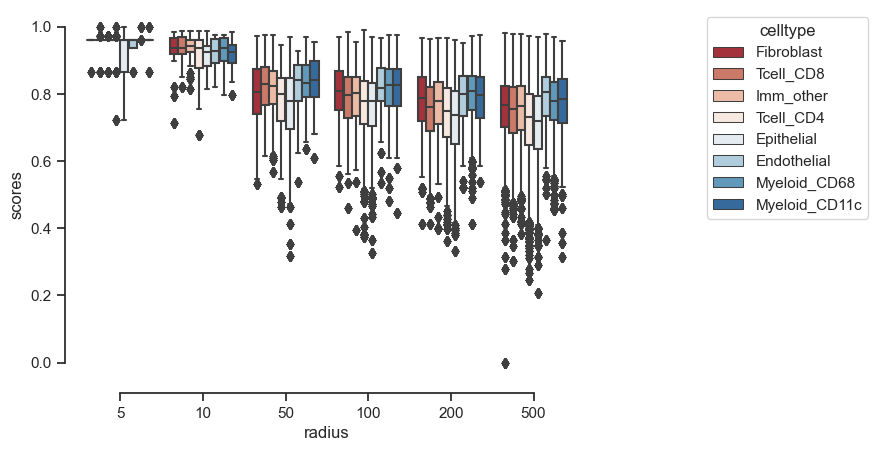

In [296]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
f=sns.boxplot(x="radius", y="scores",
            hue="celltype", palette='RdBu',
            data=df_LOCAL_ENTROPY_2)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

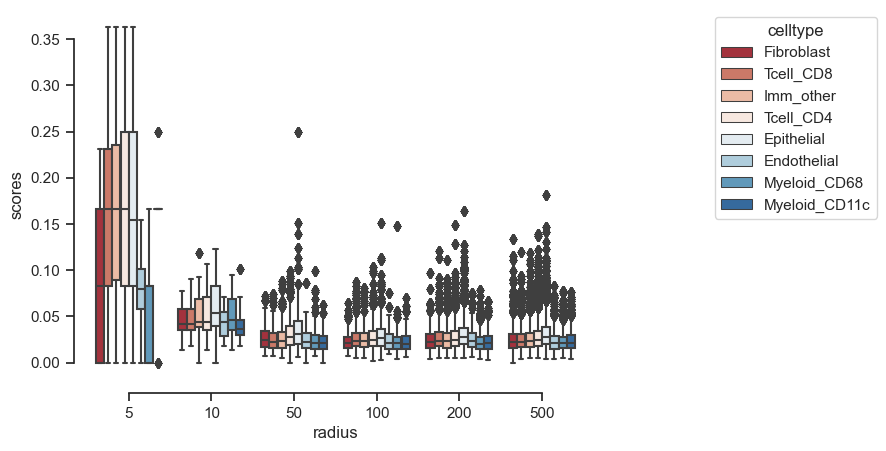

In [297]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
f=sns.boxplot(x="radius", y="scores",
            hue="celltype", palette='RdBu',
            data=df_LOCAL_HOMOPHILY_2)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

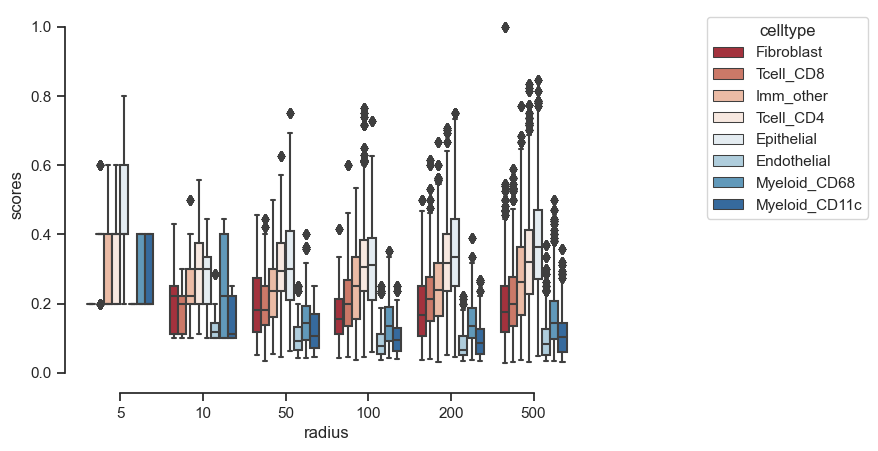

In [298]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
f=sns.boxplot(x="radius", y="scores",
            hue="celltype", palette='RdBu',
            data=df_EGOPHILY_2)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))